In [4]:
import pandas as pd
import numpy as np
data =pd.read_csv('H:\\jupyter_notebook\\ytapple_train_data.csv')
data.head()

,time,price
0,2007,3211543.0
1,2008,3574787.0
2,2009,3596019.0
3,2010,3766695.0
4,2011,3975976.0


In [5]:
price = data.loc[:,'price']
price.head()

0    3211543.0
1    3574787.0
2    3596019.0
3    3766695.0
4    3975976.0
Name: price, dtype: float64

In [6]:
#归一化处理
price_norm = price/max(price)
print(price_norm)

0    0.606084
1    0.674636
2    0.678643
3    0.710853
4    0.750349
5    0.791382
6    0.790736
7    0.797275
8    0.875005
9    1.000000
Name: price, dtype: float64


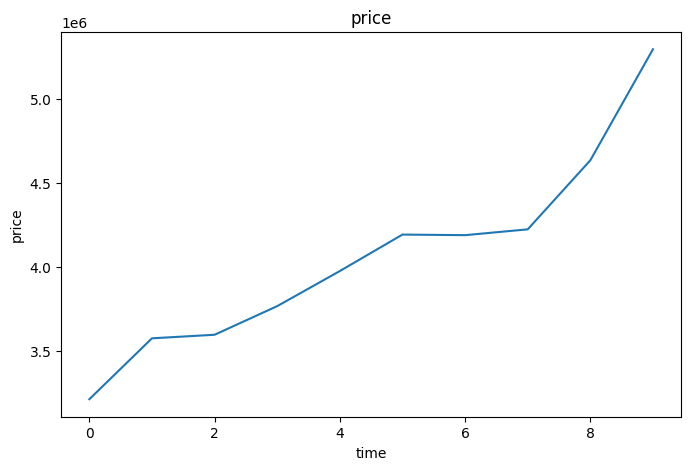

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(8,5)) 
#一层输出5个神经元units，8个数据为一组
plt.plot(price)
plt.title('price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

In [30]:
time_step = 4

In [31]:
#define x and y
#define method to extract x and y
def extract_data(data,time_step):
    x = []
    y = []
    #0,1,2,3,4,5,6,7,8,9;10个样本;time_step=8; 0,1,2,3; 1,2,3,4; 2,3,4,5; 7组样本
    for i in range(len(data)-time_step):    
        x.append([a for a in data[i:i+time_step]])
        y.append(data[i+time_step])
    x = np.array(x)
    x = x.reshape(x.shape[0],x.shape[1],1)
    return x, y

In [32]:
x,y = extract_data(price_norm,time_step)
a = x.tolist()

In [33]:
#set up the model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
model = Sequential()
#add RNN layer
model.add(SimpleRNN(units=5, input_shape=(time_step,1),activation='relu'))
#add output layer 回归可以直接用线性linear
model.add(Dense(units=1,activation='linear'))
#configure the model 设置训练配置 损失函数用举例的平方差
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 5)                 35        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [34]:
#train the model
model.fit(a,y,batch_size=50,epochs=200)


Epoch 1/200
1/1 [==============================] - 1s 839ms/step - loss: 0.8389
Epoch 2/200
1/1 [==============================] - 0s 7ms/step - loss: 0.8288
Epoch 3/200
1/1 [==============================] - 0s 8ms/step - loss: 0.8188
Epoch 4/200
1/1 [==============================] - 0s 11ms/step - loss: 0.8088
Epoch 5/200
1/1 [==============================] - 0s 8ms/step - loss: 0.7989
Epoch 6/200
1/1 [==============================] - 0s 11ms/step - loss: 0.7890
Epoch 7/200
1/1 [==============================] - 0s 9ms/step - loss: 0.7792
Epoch 8/200
1/1 [==============================] - 0s 8ms/step - loss: 0.7694
Epoch 9/200
1/1 [==============================] - 0s 10ms/step - loss: 0.7597
Epoch 10/200
1/1 [==============================] - 0s 11ms/step - loss: 0.7501
Epoch 11/200
1/1 [==============================] - 0s 7ms/step - loss: 0.7405
Epoch 12/200
1/1 [==============================] - 0s 9ms/step - loss: 0.7309
Epoch 13/200
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 6ms/step - loss: 0.0539
Epoch 105/200
1/1 [==============================] - 0s 8ms/step - loss: 0.0506
Epoch 106/200
1/1 [==============================] - 0s 7ms/step - loss: 0.0475
Epoch 107/200
1/1 [==============================] - 0s 7ms/step - loss: 0.0445
Epoch 108/200
1/1 [==============================] - 0s 8ms/step - loss: 0.0416
Epoch 109/200
1/1 [==============================] - 0s 11ms/step - loss: 0.0389
Epoch 110/200
1/1 [==============================] - 0s 8ms/step - loss: 0.0363
Epoch 111/200
1/1 [==============================] - 0s 9ms/step - loss: 0.0339
Epoch 112/200
1/1 [==============================] - 0s 8ms/step - loss: 0.0315
Epoch 113/200
1/1 [==============================] - 0s 8ms/step - loss: 0.0293
Epoch 114/200
1/1 [==============================] - 0s 10ms/step - loss: 0.0272
Epoch 115/200
1/1 [==============================] - 0s 9ms/step - loss: 0.0253
Epoch 116/200
1/1 [==============================] -

In [40]:
y_train_predict=model.predict(x)*max(price)
y_train=[i*max(price) for i in y]

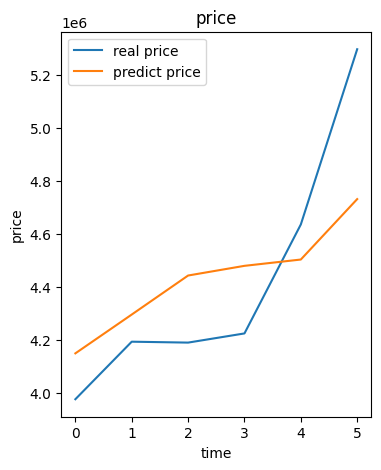

In [41]:
fig2 = plt.figure(figsize=(4,5)) 
#一层输出5个神经元units，8个数据为一组 后面改成time_step=4
plt.plot(y_train,label='real price')
plt.plot(y_train_predict,label='predict price')
plt.title('price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [42]:
data_test = pd.read_csv('H:\\jupyter_notebook\\ytapple_test_data.csv')
data_test.head()
price_test = data_test.loc[:,'price']
price_test.head()
price_test_norm = price_test/max(price) #这里的分母用回前面的price的最大值，同分母归一

#extract x_test and y_test
x_test_norm, y_test_norm = extract_data(price_test_norm,time_step)
print(x_test_norm.shape,len(y_test_norm))

(5, 4, 1) 5


In [43]:
#make prediction based on the test data
y_test_predict = model.predict(x_test_norm)*max(price)
y_test = [i*max(price) for i in y_test_norm]

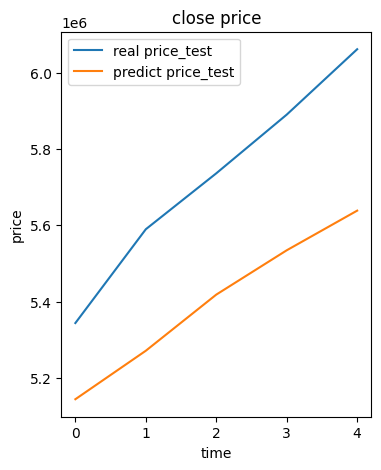

In [44]:
fig3 = plt.figure(figsize=(4,5))
plt.plot(y_test,label='real price_test')
plt.plot(y_test_predict,label='predict price_test')
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()